# HESA Data - UK Undergraduate Students

In [328]:
# Analysing student population number for UK undergraduate students 
# Data source: https://www.hesa.ac.uk/data-and-analysis/students/where-study

In [329]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
# import data: HE student enrolments by HE provider (2018-2019)
data1819 = pd.read_csv("dt051-table-1 (20182019).csv", skiprows=17, nrows=169)

# set the UKPRN as the primary key
data1819.set_index("UKPRN",inplace=True)

In [331]:
# List the dataset columns
for i in data1819.columns.values:
    print (i)

HE provider
England
Scotland
Wales
Northern Ireland
Other UK
Total UK  
Other European Union
Non-European Union
Total Non-UK
Not known
Total


In [332]:
# view data structure
data1819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 10007783 to 10007167
Data columns (total 12 columns):
HE provider             169 non-null object
England                 169 non-null object
Scotland                169 non-null object
Wales                   169 non-null object
Northern Ireland        169 non-null object
Other UK                169 non-null int64
Total UK                169 non-null object
Other European Union    169 non-null object
Non-European Union      169 non-null object
Total Non-UK            169 non-null object
Not known               169 non-null int64
Total                   169 non-null object
dtypes: int64(2), object(10)
memory usage: 17.2+ KB


In [333]:
# View sample data
data1819.head()

,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10007783,The University of Aberdeen,"1,435","7,880",45,170,10,"9,545","2,900","2,335","5,235",0,"14,775"
10007849,University of Abertay Dundee,135,"3,515",0,25,0,"3,675",530,155,680,0,"4,355"
10007856,Aberystwyth University,"3,615",45,"2,715",90,20,"6,485",900,460,"1,360",0,"7,845"
10000163,AECC University College,345,5,10,5,5,370,105,120,225,0,595
10000291,Anglia Ruskin University,"20,700",75,80,75,15,"20,950","1,555","1,985","3,540",0,"24,490"


In [334]:
# Convert object data to numbers, for each country in the UK
for i in data1819.columns.values[1:5]:
    data1819[i] = data1819[i].str.replace(",","")
    data1819[i] = data1819[i].astype(int)

In [335]:
data1819.head()

,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10007783,The University of Aberdeen,1435,7880,45,170,10,"9,545","2,900","2,335","5,235",0,"14,775"
10007849,University of Abertay Dundee,135,3515,0,25,0,"3,675",530,155,680,0,"4,355"
10007856,Aberystwyth University,3615,45,2715,90,20,"6,485",900,460,"1,360",0,"7,845"
10000163,AECC University College,345,5,10,5,5,370,105,120,225,0,595
10000291,Anglia Ruskin University,20700,75,80,75,15,"20,950","1,555","1,985","3,540",0,"24,490"


# Basic arithmatic


In [336]:
# Total number of students from England?
print("Students from England (Total): ", data1819.England.sum(), "\n")

Students from England (Total):  1556210 



In [337]:
# Total number of UK undergraduate students
total = data1819.England.sum() + data1819.Scotland.sum() + data1819.Wales.sum() + data1819["Northern Ireland"].sum()
print("Total number of UK undergraduate students (2018/2019): ", total)

Total number of UK undergraduate students (2018/2019):  1894060


# Basic Queries

In [338]:
# Average number of students from each UK country at university
e = int(data1819.England.mean())
s = int(data1819.Scotland.mean())
w = int(data1819.Wales.mean())
i = int(data1819["Northern Ireland"].mean())

print("Number of UK students from each country at a UK university (average)")
print("England: ", e)
print("Scotland: ", s)
print("Wales: ", w)
print("Northern Ireland: ", i)

Number of UK students from each country at a UK university (average)
England:  9208
Scotland:  1025
Wales:  597
Northern Ireland:  375


In [339]:
# Number of universities with 10 or less students from England
data1819[data1819["England"] <= 10]


,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10030408,Gower College Swansea,0,0,130,0,0,130,0,0,0,0,130
10009614,Grŵp NPTC Group,0,0,160,0,0,165,0,0,0,0,165
10008026,St Mary's University College,0,0,0,1025,0,"1,025",20,0,20,0,"1,045"
10008010,Stranmillis University College,10,0,0,1510,0,"1,520",15,0,15,0,"1,535"
10008574,The University of Wales (central functions),0,0,0,0,0,0,0,0,0,0,0


In [340]:
# Number of universities with 1,000 or more students from each UK country
data1819[(data1819["England"] >= 1000) & (data1819["Scotland"] >= 1000) & (data1819["Wales"] >= 1000) & (data1819["Northern Ireland"] >= 1000)]


,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10007773,The Open University,92635,16825,8625,3950,10,"122,040",215,105,320,0,"122,360"


In [341]:
# Number of universities with no students from Ireland
data1819[data1819["Northern Ireland"] == 0]

,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10000936,The University College of Osteopathy,430,0,5,0,0,440,30,20,50,0,490
10007787,The University of Buckingham,2130,25,25,0,5,"2,190",130,750,880,0,"3,070"
10003324,The Institute of Cancer Research,225,0,5,0,0,230,15,20,35,0,265
10007761,Courtauld Institute of Art,275,0,5,0,0,280,85,130,215,0,495
10004511,The National Film and Television School,175,5,0,0,0,180,65,50,115,0,300
10030408,Gower College Swansea,0,0,130,0,0,130,0,0,0,0,130
10007820,Grŵp Llandrillo Menai,15,0,1395,0,0,"1,410",0,0,0,0,"1,410"
10007769,London Business School,490,5,0,0,0,500,325,"1,255","1,580",0,"2,075"
10007797,University of London (Institutes and activities),145,5,5,0,0,150,35,60,90,0,245


# Search for univeristy details

In [342]:
# Search for a university... enter the name in the 'contains' method
uni_search = "Leeds"
uni = data1819[data1819["HE provider"].str.contains(uni_search)]

# 'uni' is a two dimensional array as [row][columns] accessible using indecies
uni

,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10003854,Leeds Arts University,1615,15,35,15,5,"1,680",45,120,165,0,"1,850"
10003861,Leeds Beckett University,21270,115,255,195,55,"21,890",410,975,"1,385",0,"23,275"
10034449,Leeds College of Music,1035,20,20,10,0,"1,090",35,55,90,0,"1,180"
10007795,The University of Leeds,26155,170,435,190,70,"27,020","1,545","7,690","9,235",0,"36,250"
10003863,Leeds Trinity University,3300,10,25,30,0,"3,365",40,10,50,0,"3,415"


In [355]:
# count position of univeristy row, starting at 0, e.g. 3 = The University of Leeds
uni_name  = uni.iloc[3][0] # the second array dimension is the column index, e.g. 1 = 'HE provider', 2 = 'England'
uni_eng   = uni.iloc[3][1]
uni_scot  = uni.iloc[3][2]
uni_wal   = uni.iloc[3][3]
uni_ire   = uni.iloc[3][4]
uni_total = uni_eng + uni_scot + uni_wal + uni_ire

print("Students at", uni_name)
print("England: ", uni_eng)
print("Scotland: ", uni_scot)
print("Wales: ", uni_wal)
print("Northern Ireland: ", uni_ire)
print("Total: ", uni_total)

Students at The University of Leeds
England:  26155
Scotland:  170
Wales:  435
Northern Ireland:  190
Total:  26950


# Visualise the data

In [344]:
# For these visualisations, we'll compare historical data to the most recent data available

# import and normalise data: HE student enrolments by HE provider (2014-2015)
data1415 = pd.read_csv("dt051-table-1 (20142015).csv", skiprows=17, nrows=169)
data1415.set_index("UKPRN",inplace=True)
for i in data1415.columns.values[1:5]:
    data1415[i] = data1415[i].str.replace(",","")
    data1415[i] = data1415[i].astype(int)

# import and normalise data: HE student enrolments by HE provider (2015-2016)
data1516 = pd.read_csv("dt051-table-1 (20152016).csv", skiprows=17, nrows=169)
data1516.set_index("UKPRN",inplace=True)
for i in data1516.columns.values[1:5]:
    data1516[i] = data1516[i].str.replace(",","")
    data1516[i] = data1516[i].astype(int)

# import and normalise data: HE student enrolments by HE provider (2016-2017)
data1617 = pd.read_csv("dt051-table-1 (20162017).csv", skiprows=17, nrows=169)
data1617.set_index("UKPRN",inplace=True)
for i in data1617.columns.values[1:5]:
    data1617[i] = data1617[i].str.replace(",","")
    data1617[i] = data1617[i].astype(int)

# import and normalise data: HE student enrolments by HE provider (2017-2018)
data1718 = pd.read_csv("dt051-table-1 (20172018).csv", skiprows=17, nrows=169)
data1718.set_index("UKPRN",inplace=True)
for i in data1718.columns.values[1:5]:
    data1718[i] = data1718[i].str.replace(",","")
    data1718[i] = data1718[i].astype(int)


In [357]:
# display data from 2014-2015
data1415.head()

,HE provider,England,Scotland,Wales,Northern Ireland,Other UK,Total UK,Other European Union,Non-European Union,Total Non-UK,Not known,Total
UKPRN,,,,,,,,,,,,
10007783.0,The University of Aberdeen,1485,8310,35,230,5,"10,065","2,455","1,515","3,970",0,"14,035"
10007849.0,University of Abertay Dundee,195,3395,5,155,0,"3,750",365,110,475,0,"4,220"
10007856.0,Aberystwyth University,4765,45,3570,60,20,"8,460",765,615,"1,375",0,"9,835"
10000291.0,Anglia Ruskin University,16880,55,90,75,5,"17,110",835,"1,885","2,720",0,"19,830"
10007759.0,Aston University,8275,75,145,35,5,"8,540",755,"1,775","2,530",0,"11,070"


In [345]:
dur1415 = data1415[data1415["HE provider"].str.contains("Durham")]
dur1516 = data1516[data1516["HE provider"].str.contains("Durham")]
dur1617 = data1617[data1617["HE provider"].str.contains("Durham")]
dur1718 = data1718[data1718["HE provider"].str.contains("Durham")]
dur1819 = data1819[data1819["HE provider"].str.contains("Durham")]

dur_eng = [dur1415.iloc[0][1], dur1516.iloc[0][1], dur1617.iloc[0][1], dur1718.iloc[0][1], dur1819.iloc[0][1]]
dur_sco = [dur1415.iloc[0][2], dur1516.iloc[0][2], dur1617.iloc[0][2], dur1718.iloc[0][2], dur1819.iloc[0][2]]
dur_wal = [dur1415.iloc[0][3], dur1516.iloc[0][3], dur1617.iloc[0][3], dur1718.iloc[0][3], dur1819.iloc[0][3]]
dur_ire = [dur1415.iloc[0][4], dur1516.iloc[0][4], dur1617.iloc[0][4], dur1718.iloc[0][4], dur1819.iloc[0][4]]

year = ['2015', '2016', '2017', '2018', '2019']

In [362]:
# display students at Durham University who come from England

print("Number of Undergraduate Students at Durham University from England (2015-2019)")
print("2015: ", dur_eng[0])
print("2016: ", dur_eng[1])
print("2017: ", dur_eng[2])
print("2018: ", dur_eng[3])
print("2019: ", dur_eng[4])

Number of Undergraduate Students at Durham University from England (2015-2019)
2015:  12215
2016:  12245
2017:  12540
2018:  12385
2019:  12485


<Figure size 576x396 with 0 Axes>

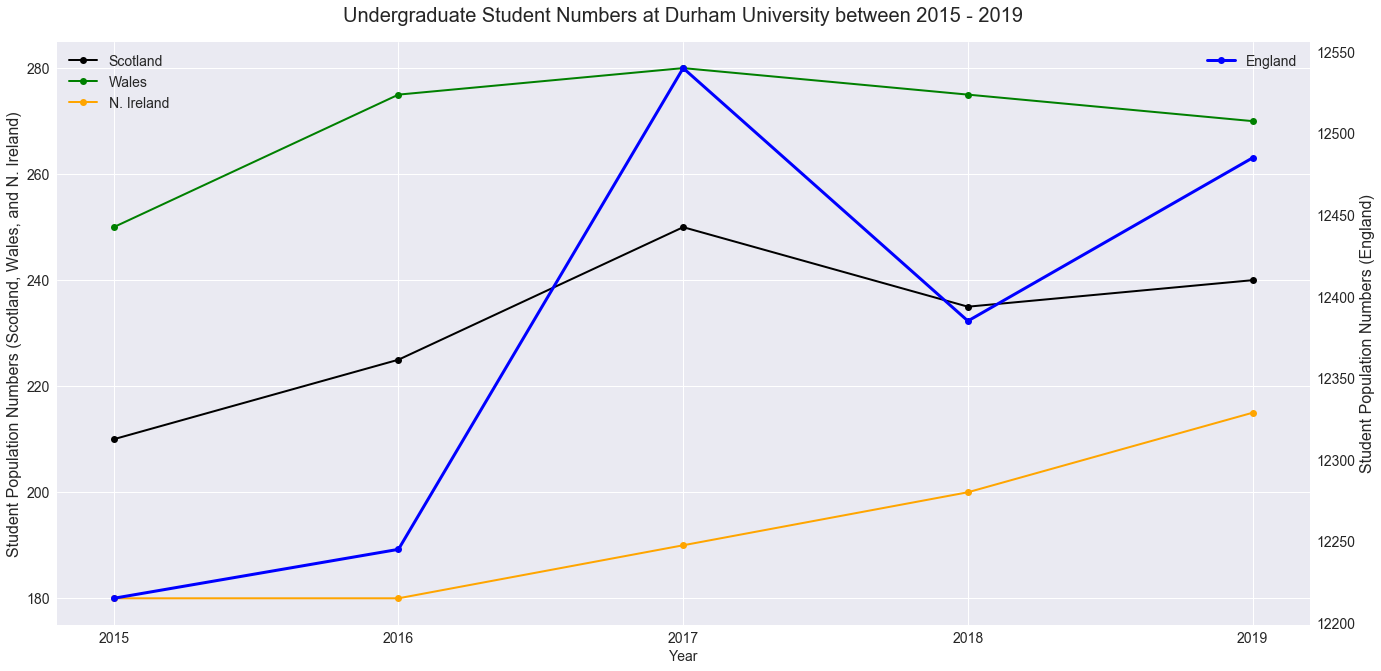

In [352]:
dur_eng_df = pd.DataFrame(dur_eng)
dur_sco_df = pd.DataFrame(dur_sco)
dur_wal_df = pd.DataFrame(dur_wal)
dur_ire_df = pd.DataFrame(dur_ire)

x = year
y1a = dur_sco_df
y1b = dur_wal_df
y1c = dur_ire_df
y2 = dur_eng_df

fig = plt.figure()
fig, ax1 = plt.subplots(figsize=[20,10])

ax2 = ax1.twinx() # share the x-axis

ax1.plot(x,y1a, color="black", label="Scotland", linewidth=2, marker="o")
ax1.plot(x,y1b, color="green", label="Wales", linewidth=2, marker="o")
ax1.plot(x,y1c, color="orange", label="N. Ireland", linewidth=2, marker="o")
ax1.grid(color="white")

ax2.plot(x,y2, label="England", color="blue", linewidth=3, marker="o")
ax2.grid(False)
plt.style.use('seaborn-dark')
ax1.legend(fontsize=14)
ax2.legend(fontsize=14)

ax1.set_ylabel("Student Population Numbers (Scotland, Wales, and N. Ireland)", fontsize=16)
ax1.tick_params(labelsize=14)
ax2.set_ylabel("Student Population Numbers (England)", fontsize=16)
ax2.tick_params(labelsize=14)

ax1.set_xlabel("Year", fontsize=14)
plt.title("Undergraduate Student Numbers at Durham University between 2015 - 2019", fontsize=20, pad=20)
plt.plot()
plt.show()